<a href="https://colab.research.google.com/github/josephplpriest/corporate_reputation/blob/main/Corporate_reputation_rankings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install plotly
!pip install seaborn;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Background:

We are examining data from the Axios-Harris annual poll of US consumers regarding corporate sentiment for the most recognizable household names among all US corporations. The polling is an aggregation (the "reputation" dataframe) of 7 different metrics ("Ethics", "Trust", etc) which forms an overall score which is used to rank companies. There are five rows per company in the "axios" dataframe, all containing the current year's rank and the five previous years (NA for companies which were not on the list previously).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf    # https://pypi.org/project/yfinance/

In [ ]:
axios = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-31/axios.csv")

reputation = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-31/reputation.csv")

# Corporate Reputation Rankings - Exploratory Data Analysis and Visualizations

##Overview:

----
You are new data analysts of company X. The annual corporate reputation rankings have been released and your manager has asked you to see how company X is doing relative to the industry category overall, as well as the entire list of 100 companies.

Your group is going to create 2-3 graphs to show how the company is doing.

___
We want to show at least one graph which represents the company performance vs. our industry competitors (in the same industry).

We should also show one graph with how our company is doing on the various reputation metrics, possibly highlighting our best/worst metrics.



## Selected Industries/Companies:

* Retail - Target
* Tech - Google
* Food - Yum Brands
* Financial - Bank of America 
* Automotive - Ford 

### Reminder:
Pandas dataframes are composed of multiple columns (pd.Series type) in which all values must be the same type in a single column.

In [ ]:
axios.head(10)

,company,industry,2022_rank,2022_rq,change,year,rank,rq
0,Trader Joe's,Retail,1,82.4,NaN,2017.0,NaN,NaN
1,Trader Joe's,Retail,1,82.4,NaN,2018.0,NaN,NaN
2,Trader Joe's,Retail,1,82.4,NaN,2019.0,NaN,78.2
3,Trader Joe's,Retail,1,82.4,NaN,2020.0,NaN,80.7
4,Trader Joe's,Retail,1,82.4,NaN,2021.0,NaN,NaN
5,HEB Grocery,Retail,2,82.0,NaN,2017.0,NaN,NaN
6,HEB Grocery,Retail,2,82.0,NaN,2018.0,NaN,81.1
7,HEB Grocery,Retail,2,82.0,NaN,2019.0,NaN,82.5
8,HEB Grocery,Retail,2,82.0,NaN,2020.0,NaN,83.1
9,HEB Grocery,Retail,2,82.0,NaN,2021.0,NaN,NaN


In [ ]:
# to select a subset of rows, you can put a mask with a boolean (True/False) statement inside like "df[df.col=="something"]" 

axios[axios["company"] == "Walmart"]

,company,industry,2022_rank,2022_rq,change,year,rank,rq
380,Walmart,Retail,77,70.7,6.0,2017.0,76.0,67.96
381,Walmart,Retail,77,70.7,6.0,2018.0,69.0,68.52
382,Walmart,Retail,77,70.7,6.0,2019.0,79.0,66.90
383,Walmart,Retail,77,70.7,6.0,2020.0,85.0,68.10
384,Walmart,Retail,77,70.7,6.0,2021.0,83.0,69.70


In [ ]:
reputation.head()

,company,industry,name,score,rank
0,Trader Joe's,Retail,TRUST,82.72,3
1,Trader Joe's,Retail,ETHICS,82.50,2
2,Trader Joe's,Retail,GROWTH,84.11,2
3,Trader Joe's,Retail,P&S,83.51,10
4,Trader Joe's,Retail,CITIZENSHIP,79.96,3


## For some plotting inspiration:

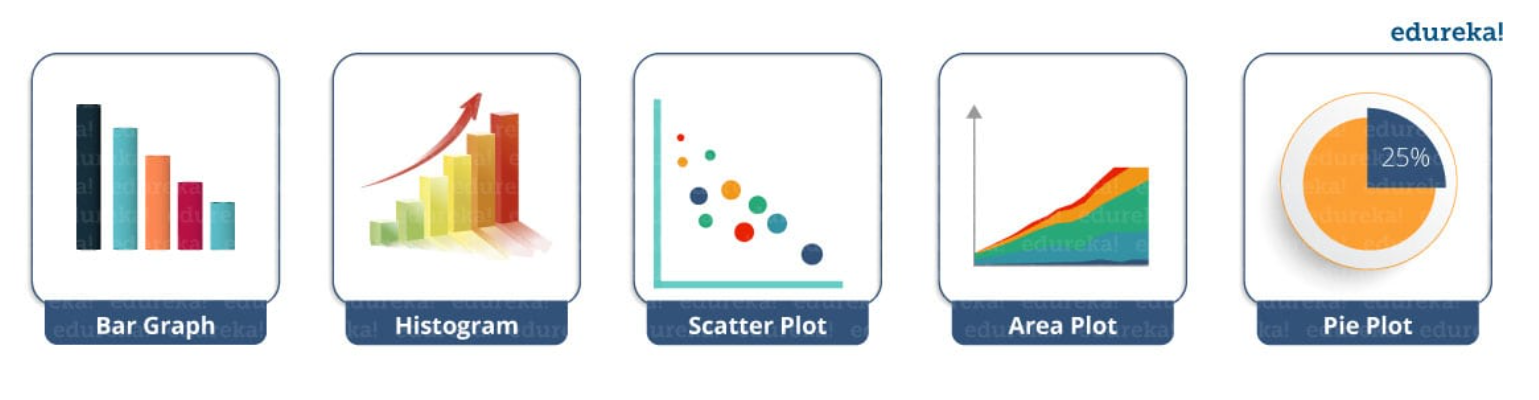

## Bar graphs  -  *showing differing quantities*

## Histogram  -  *grouping by value into bins, nice to show distributions*

## Scatter plot  -  *show the relationship between two numeric categories*

#### Area plot  -  showing proportion, possibly over time

#### Pie plot  -  hard to read, not recommended if there are many categories

## The yfinance library will allow you to get historical stock price data if you have the ticker symbol for the company you are interested in.

In [ ]:
ticker = yf.Ticker("MSFT")
five_years = ticker.history(period="5y")
five_years.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-15,279.715990,280.221869,277.563552,278.753845,22604200,0.0,0
2021-07-16,279.785421,281.798978,277.196544,278.476105,26186800,0.0,0
2021-07-19,276.670851,278.099190,272.227155,274.766418,32935600,0.0,0
2021-07-20,275.778118,278.694308,274.022465,277.057678,26259700,0.0,0
2021-07-21,276.641098,279.239873,275.044152,279.120850,24364300,0.0,0


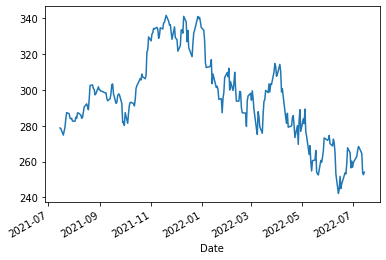

In [ ]:
five_years["Close"].plot()